# Boston House Price Dataset Analysis

In this dataset, we will **predict the price** of the Boston house. This is a very basic and popular dataset for beginner data scientist.

<!-- <p align="center">
<img src="penguin.png" width="480">
</p> -->

Source code I downloaded from: [Kaggle](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

___

|Rating           |A challenge dataset for outliers treatment|
|-----------------|-|
|Difficulty       | <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9734; </font> |
|Dataset size     | <font size=5>  &#9733; &#9734; &#9734; &#9734; &#9734; </font> |
|Interesting topic| <font size=5>  &#9733; &#9733; &#9733; &#9734; &#9734; </font> |
|Popularity       | <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9733; </font> |

___

In [1]:
# Framework for data cleaning and data visualising
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Framework for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
sns.set_style("darkgrid")

In [3]:
# [Please notice]
# this CSV file has ' ' (space) as a separated value, instead of ',' (comma). Therefore, we need `delim_whitespace=True`
# Also, this dataset does not have column names. We need `header=None` to avoid reading the first valuable row!

df = pd.read_csv("housing.csv", header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


___

## 1) A data's problem

*What area of a room is the warmest?*

***The corner, because it's always about 90 degrees!***

___

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


___

Fortunately, this dataset does not have null columns. However, each column name in the table is the number. Therefore, we have to fix it manually. However, let's have a look with these feature first:

0) `CRIM` is the crime rate per capita by town. Mostly they are pretty low, but some regions have extremely high crime rate!
1) `ZN` is the percentage of residential land zoned for lots > 25,000 sq.ft, or 2322 m2. To be simpler, it is the percentage of area that you can build a house or something else.
2) `INDUS` is the percentage of non-retail business.
3) `CHAS`: if `1` the house is near or beside the Charles River.
4) `NOX` is the nitric oxides rate (value per 10 million, instead of per 100).
5) `RM` is the average number of rooms.
6) `AGE` is the average number of houses built before 1940. I hope this explanation is correct.
7) `DIS` is how far away from the main job areas.
8) `RAD` is the value showing the difficulty to get to highways.
9) `TAX` is the rate per \$10,000. This explanation is quite over-simple.
10) `PTRATIO` is the percentage of pupils and teachers.
11) `B`: from `1000 * (Bk − 0.63) ^ 2`, where `Bk` is the percentage of the black.
12) `LSTAT` is the percentage of the lower-status or people.
13) `MEDV` is the median value of owner-occupied homes in $1000s.

The dataset can also be found on [an older version of ScikitLearn](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html).

**I had a stroke when searching the meaning of these.**

___

In [5]:
# Replace column names
df.rename(columns={
    0: "CRIM", 1: "ZN", 2: "INDUS", 3: "CHAS", 4: "NOX", 5: "RM", 6: "AGE",
    7: "DIS", 8: "RAD", 9: "TAX", 10: "PTRATIO", 11: "B", 12: "LSTAT", 13: "MEDV"
}, inplace=True)

___

## 2) Analysis

*What do real estate agents have to be thankful for this year?*

***Lots.***

___

### Data distribution

___

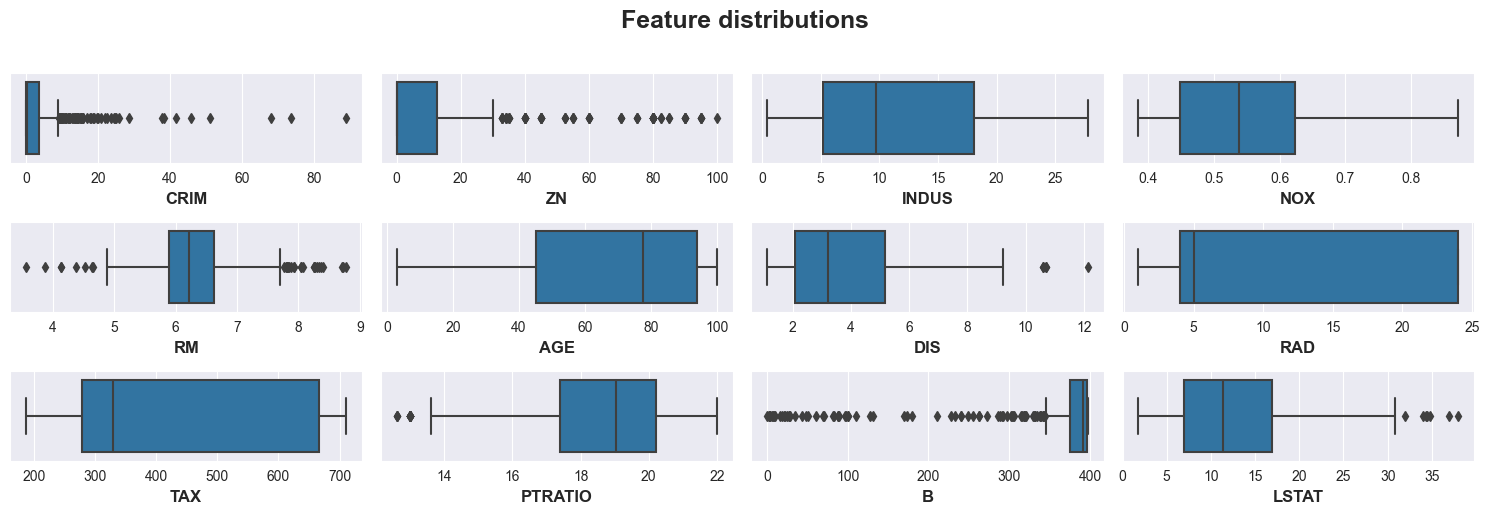

In [6]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))

fig.tight_layout()

columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    #curr_ax.boxplot(df[columns[i]], vert=False)
    sns.boxplot(df, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

___

Please notice the data distributions:
- Pretty fine: `INDUS`, `NOX`, `AGE`, `RAD`, and `TAX`
- Need a little improvement: `RM`, `DIS`, `PTRATIO`, and `LSTAT`
- Need investigating more: `CRIM`, `ZM`, and `B`

And do you know what? We have to treat **outliers**!

___

**Introducing to boxcox:**
- It is one of the best data transformation that re-distribute the feature into the normal distribution. It is powerful for linear regression and KNN.

In [7]:
df_fixed = df.copy()
for i in range(12):
    df_fixed[columns[i]] = boxcox(df_fixed[columns[i]] + 1)[0]

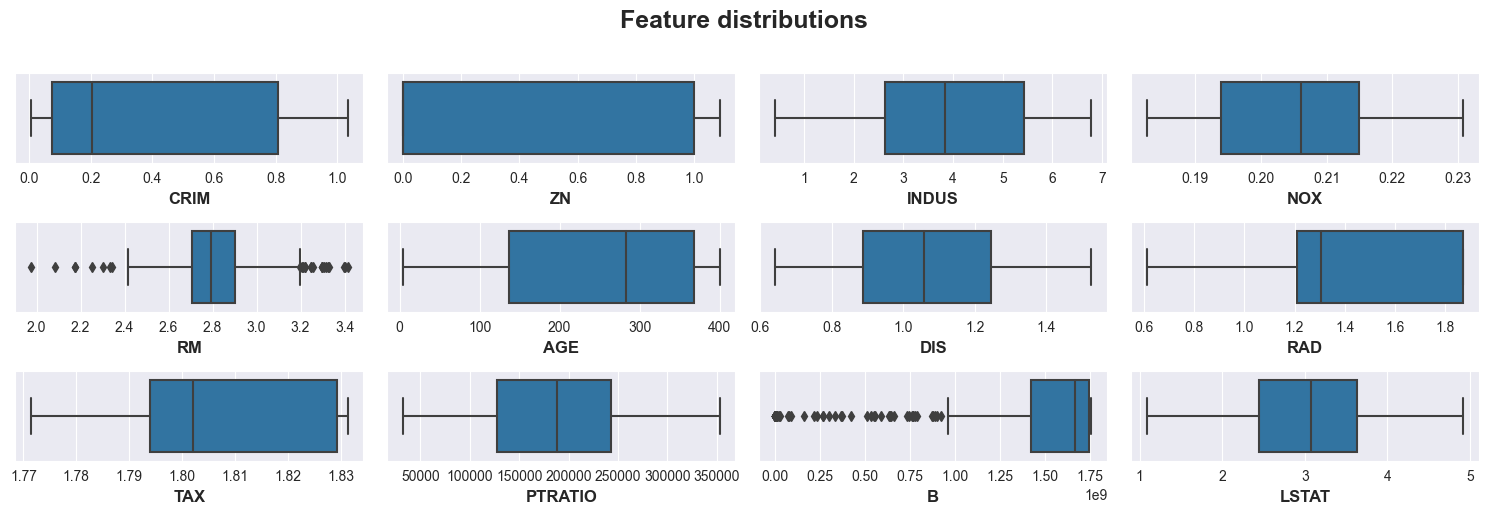

In [8]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))

fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    #curr_ax.boxplot(boxcox(df[columns[i]] + 1)[0], vert=False)
    sns.boxplot(df_fixed, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

___

**Oopsie!**

The data distribution still gone wrong!
Let's see the details of some features.

___

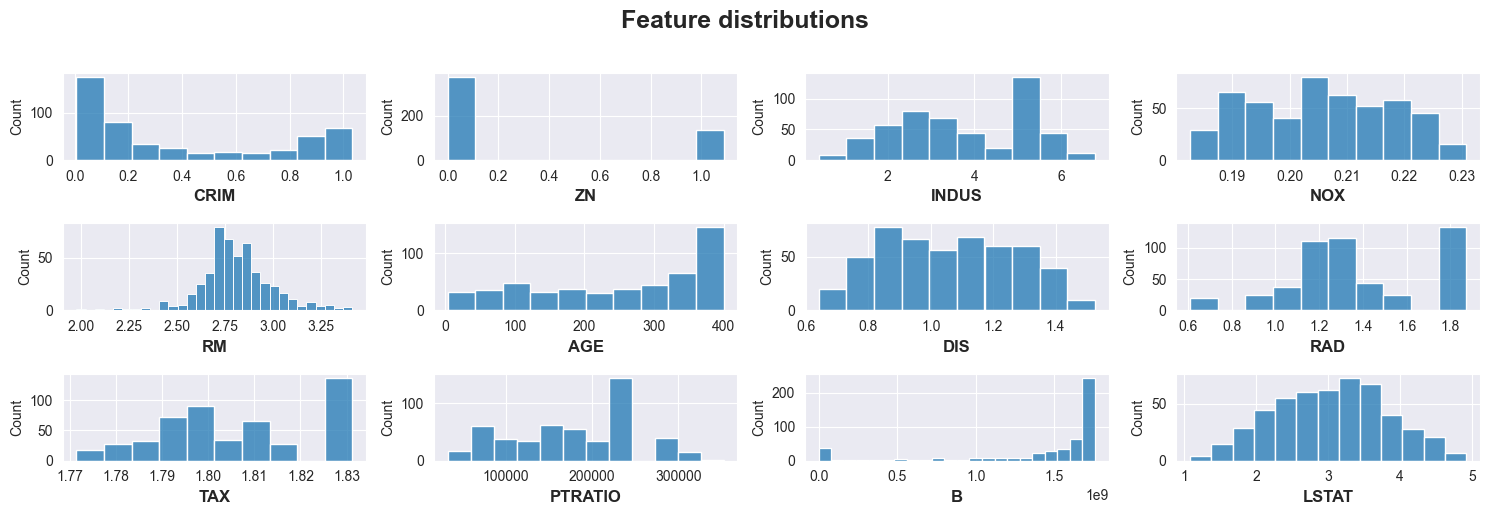

In [9]:
fig, ax = plt.subplots(3, 4, figsize=(15, 5))

fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    sns.histplot(df_fixed, x=columns[i], ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Feature distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

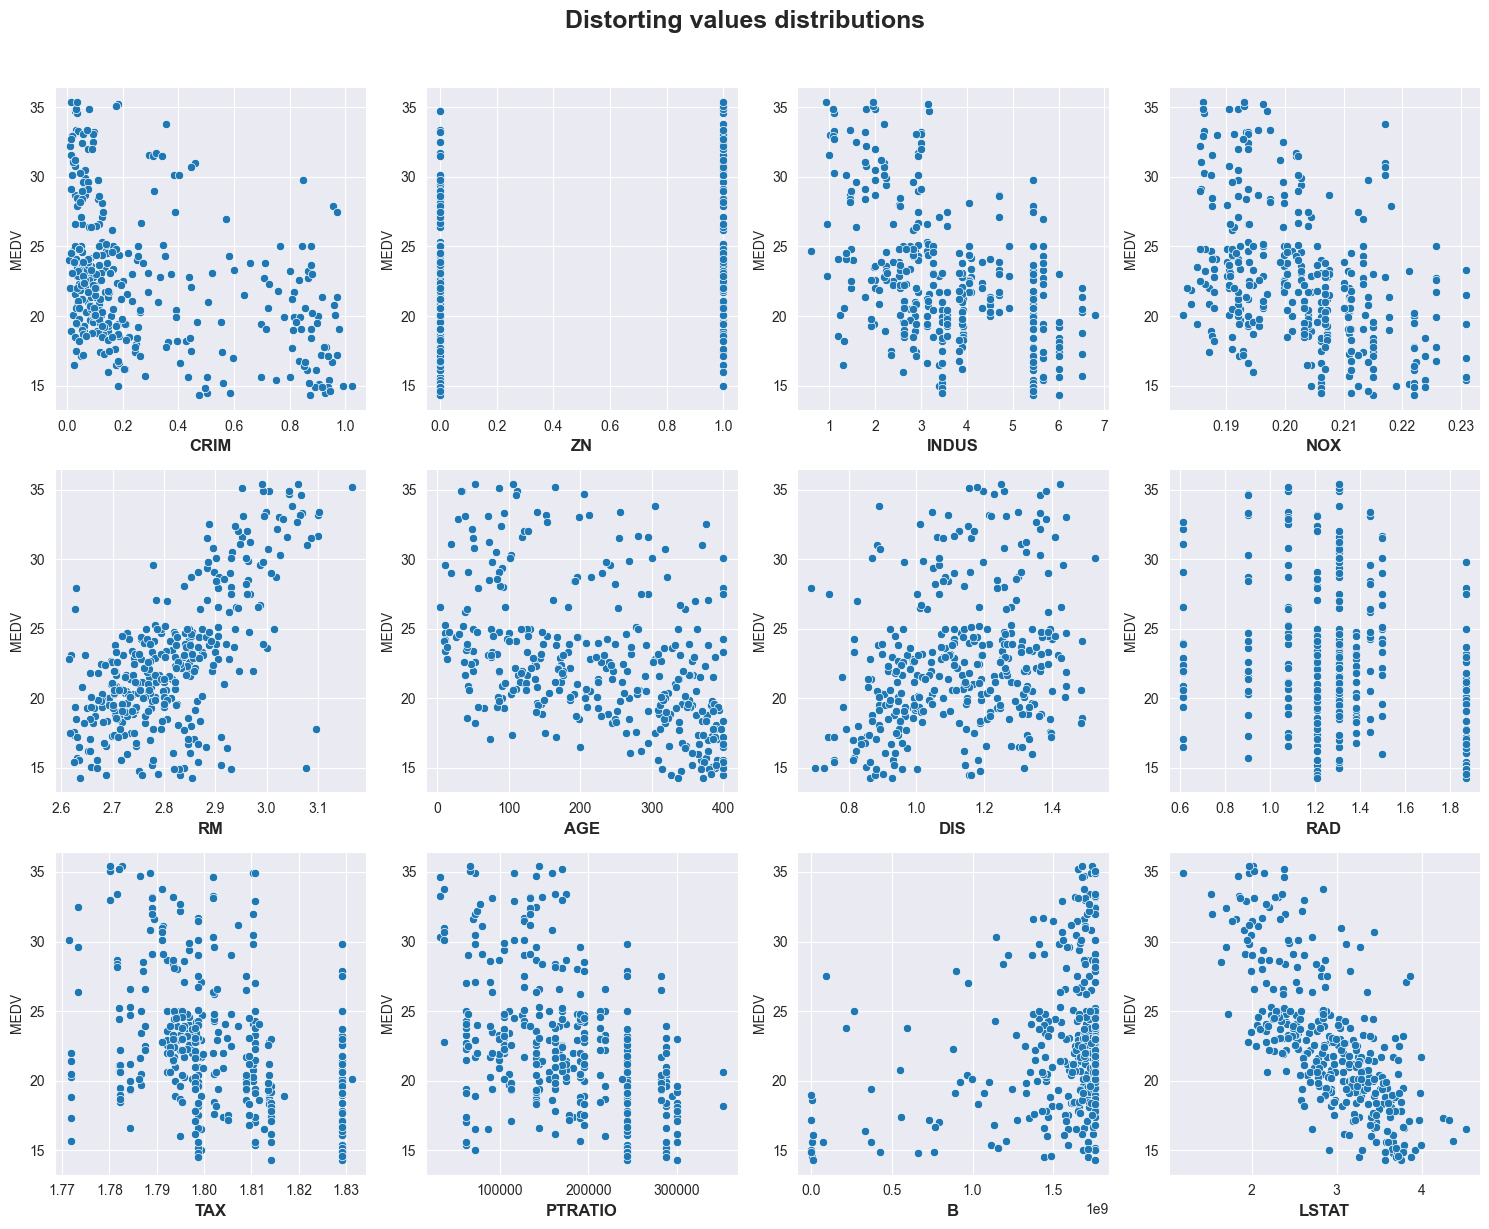

In [31]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))

fig.tight_layout()

for i in range(12):
    curr_ax = ax[i // 4, i % 4]
    sns.scatterplot(df_fixed, x=columns[i], y="MEDV", ax=curr_ax)
    curr_ax.set_xlabel(columns[i], fontsize=12, fontweight="bold")

fig.suptitle("Distorting values distributions", fontsize=18, fontweight="bold", y=1.02)
fig.tight_layout()

plt.show()

___

0) `CRIM`: ****. it seems the location having low crime rate also has higher house prices.
1) `ZN` 
2) `INDUS` is the percentage of non-retail business.
3) `CHAS`: if `1` the house is near or beside the Charles River.
4) `NOX` is the nitric oxides rate (value per 10 million, instead of per 100).
5) `RM` is the average number of rooms.
6) `AGE` is the average number of houses built before 1940. I hope this explanation is correct.
7) `DIS` is how far away from the main job areas.
8) `RAD` is the value showing the difficulty to get to highways.
9) `TAX` is the rate per \$10,000. This explanation is quite over-simple.
10) `PTRATIO` is the percentage of pupils and teachers.
11) `B`: from `1000 * (Bk − 0.63) ^ 2`, where `Bk` is the percentage of the black.
12) `LSTAT` is the percentage of the lower-status or people.
13) `MEDV` is the median value of owner-occupied homes in $1000s.

For `ZN`: It is good to convert it into boolean value (In fact, they are float values).

`RM` is easy to fix by dropping outliers. **Dropping outliers is important for linear regression.**

However, `B` is more difficult to treat. The data distribution still not improved even after using boxcox. Thus, this feature seems not to fix the linear regression well.

I could make them more perfect, but let's only focus on some serious features.

___

Drop outliers

In [10]:
q1 = np.percentile(df_fixed["RM"], 25, method='midpoint')
q3 = np.percentile(df_fixed["RM"], 75, method='midpoint')
iqr = q3 - q1

upper_range = q3 + 1.5 * iqr
lower_range = q3 - 1.5 * iqr

df_fixed = df_fixed[(df_fixed["RM"] > lower_range) & (df_fixed["RM"] < upper_range)]

Do not forget the label's name is `MEDV`

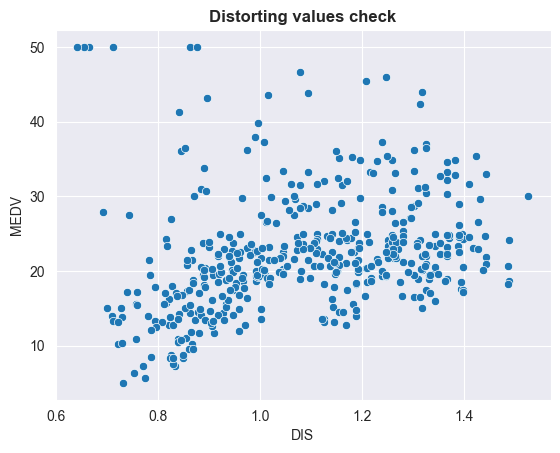

In [11]:
sns.scatterplot(df_fixed, x="DIS", y="MEDV")
plt.title("Distorting values check", fontsize=12, fontweight="bold")
plt.show()

In [12]:
q1 = np.percentile(df_fixed["MEDV"], 25, method='midpoint')
q3 = np.percentile(df_fixed["MEDV"], 75, method='midpoint')
iqr = q3 - q1

upper_range = q3 + 1.5 * iqr
lower_range = q3 - 1.5 * iqr

df_fixed = df_fixed[(df_fixed["MEDV"] > lower_range) & (df_fixed["MEDV"] < upper_range)]

Convert types

(array([  5.,   6.,   7.,   5.,  10.,   3.,   3.,   7.,  19., 441.]),
 array([ 0.56568542,  2.50135181,  4.43701819,  6.37268458,  8.30835096,
        10.24401734, 12.17968373, 14.11535011, 16.05101649, 17.98668288,
        19.92234926]),
 <BarContainer object of 10 artists>)

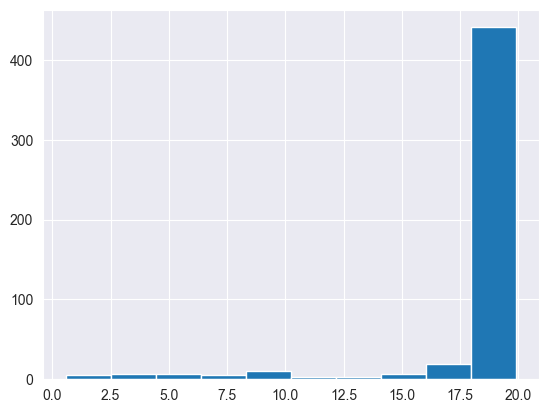

In [29]:
plt.hist(np.sqrt(df["B"]))

In [13]:
df_fixed["ZN"] = df_fixed["ZN"].apply(lambda x: abs(x - 1) < 0.1)
df_fixed["ZN"] = df_fixed["ZN"].astype(bool)    # True if low criminal rate, else high rate

### Correlation coefficients

___

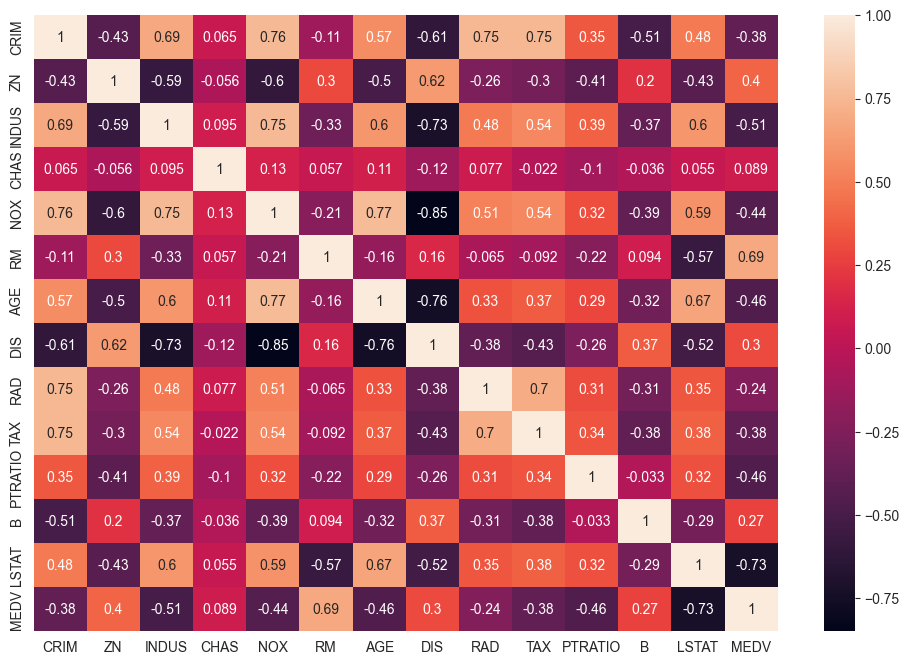

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_fixed.corr(), annot=True, ax=ax)

plt.show()

___

It is huge, but let's have a look of each of these:

- The features which correlate with `MEDV` (label). **It seems**:
  - `ZN`: The higher the area is, the higher the price of the house is.
  - `RM`: The more expensive houses have more rooms.
  - `DIS`: The expensive houses is far away from the main job area.
  - `B`: The higher the black people rate in the area, the more expensive the house is.

- And inverse ratio. **It seems**:
  - `CRIM`: Low criminal rate makes the house more valuable.
  - `INDUS`: Surprisingly, the houses with high business rate would be likely to cheaper.
  - `NOX`: The high rate of nitric oxide lower the quality of the house.
  - `AGE`: Old house has higher age. It is not like antique products, as the quality of the house plays an important part of the price (although there is an exception).
  - `RAD`: Smooth roads have more pricey houses.
  - `TAX`: I do not know why low taxes makes the house more expensive.
  - `LSTAT`: The rich people mostly gather in specific places, as well as the poor ones.

___

___

## 3) Modeling

*What type of real estate transactions do dwarves prefer?*

***Short sales.***

___

___

### Linear Regression

The linear regression model is the simplest model, Yet it requires strict preprocessings, including treating outliers.
This time, I use OLS from statsmodels to train the model.

___

In [15]:
X = df_fixed.drop(columns=["MEDV"])
y = df_fixed["MEDV"]

# One-hot encoding
X = pd.get_dummies(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 13), (72, 13), (288,), (72,))

In [16]:
lr_model_2 = sm.OLS(y_train, X_train.astype(float))
res = lr_model_2.fit()
y_pred = res.predict(X_test.astype(float))

In [17]:
print(f"RMSE Score: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score  : {r2_score(y_test, y_pred)}")

RMSE Score: 5.548020771671044
R2 Score  : 0.8244663690727739


Pretty high R2 score, if not too perfect.
Let's see the affect of each value.

In [18]:
coef_table = pd.DataFrame(X_train.columns, columns=["Feature"])
coef_table["Mean"] = np.round(np.mean(X_train, axis=0).to_numpy(), 2)
coef_table["Weight"] = np.round(res.params.to_numpy(), 3)
coef_table["PValue"] = np.round(res.pvalues.to_numpy(), 3)
coef_table["Importance"] = coef_table["Weight"] * coef_table["Mean"]
coef_table

,Feature,Mean,Weight,PValue,Importance
0,CRIM,2.900000e-01,-0.742,0.499,-0.21518
1,ZN,3.000000e-01,-0.030,0.950,-0.00900
2,INDUS,3.670000e+00,-0.422,0.023,-1.54874
3,CHAS,7.000000e-02,1.159,0.076,0.08113
4,NOX,2.000000e-01,-38.893,0.237,-7.77860
5,RM,2.810000e+00,17.861,0.000,50.18941
6,AGE,2.239100e+02,-0.009,0.000,-2.01519
7,DIS,1.120000e+00,-9.046,0.000,-10.13152
8,RAD,1.310000e+00,1.037,0.203,1.35847
9,TAX,1.800000e+00,0.187,0.973,0.33660


___

This is not a reliable method to figure out the importance of the features. However, we can see which ones will affect the result, according to the model:
- `DIS` (`-9.80896`), `NOX` (`-9.36620`) and `LSTAT` (`-6.72768`) affect the result in a negative way.
  - `NOX` and **especially `LSTAT`** gave the negative corelations coefficients. This is expected. Please also notice the p-value. In this case, `NOX` has pretty high p-value (which is > 0.05). This implies the nitric oxide does not affect the house of the price in some circumstances.
  - However, `DIS` have the positive ones. This means the data distribution is not really linear.
- `RM` affects the result in a positive way.

From this result, we can safely conclude:
- `RM`: The more number of rooms is, the more expensive the price of the house is.
- `LSTAT`: Rich people tend to stay together, as well as the poor ones.
- `DIS`: Nearing the main job areas has an advantage to work. Therefore, the price of the house is high.
- `NOX`: In some areas, the air population can affect the house price in a negative way. Some are exceptions.

___

___

### Decision Tree Regression

Decision tree is one of the most important supervised learning model and it is also powerful. There are some drawbacks, but we will talk about this in the more difficult topic.

___

In [19]:
dt_result = pd.DataFrame(columns=["RMSE_Train", "RMSE_Test", "R2_Train", "R2_Test"], index=np.array(range(15, 36, 2)))

In [20]:
# I recommend parallel execution than this iterative procedure
for i in range(15, 36, 2):
    dt_model = DecisionTreeRegressor(max_depth=i)
    dt_model.fit(X_train, y_train)
    y_pred_train = dt_model.predict(X_train)
    y_pred_test = dt_model.predict(X_test)

    dt_result.loc[i, "RMSE_Train"] = mean_squared_error(y_train, y_pred_train)
    dt_result.loc[i, "R2_Train"]   = r2_score(y_train, y_pred_train)
    dt_result.loc[i, "RMSE_Test"]  = mean_squared_error(y_test, y_pred_test)
    dt_result.loc[i, "R2_Test"]    = r2_score(y_test, y_pred_test)

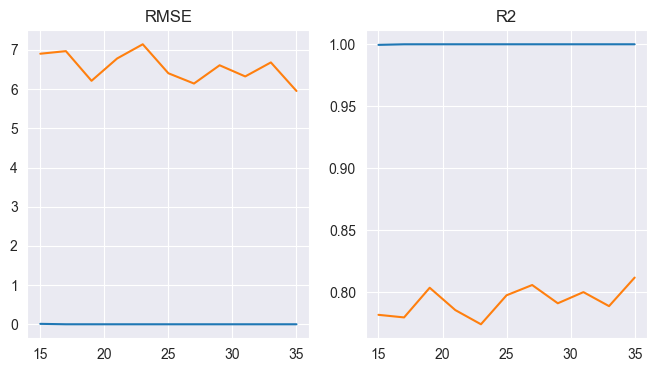

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(dt_result.index, dt_result["RMSE_Train"])
ax[0].plot(dt_result.index, dt_result["RMSE_Test"])
ax[0].set_title("RMSE")

ax[1].plot(dt_result.index, dt_result["R2_Train"])
ax[1].plot(dt_result.index, dt_result["R2_Test"])
ax[1].set_title("R2")

#fig.legend([*plot1, *plot2], loc="center left", bbox_to_anchor=(0.9, 0.8), title="Classification")
#ax.legend()
#fig.suptitle("RMSE and R2 score", fontsize=18, fontweight="bold", y=1.05)

plt.show()

In [22]:
dt_result

,RMSE_Train,RMSE_Test,R2_Train,R2_Test
15,0.010823,6.903212,0.999519,0.78159
17,0.000255,6.969306,0.999989,0.779498
19,0.0,6.2125,1.0,0.803443
21,0.0,6.782222,1.0,0.785418
23,0.0,7.144306,1.0,0.773962
25,0.0,6.404583,1.0,0.797366
27,0.0,6.142639,1.0,0.805653
29,0.0,6.608611,1.0,0.79091
31,0.0,6.32375,1.0,0.799923
33,0.0,6.68125,1.0,0.788612


___

**Something is wrong!!!**

When **predicting**, the R2 score of the decision tree is pretty low, as well as the RMSE pretty high, unlike when **fitting**. When the **fitting result is good** but the **predicting result is bad**, this is called **Overfitting**.

To solve that, we can use Random forest, a series of smaller Decision Trees.

___

In [23]:
rf_model = RandomForestRegressor(max_depth=15, n_estimators=125)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [24]:
print(f"RMSE score: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score:   {r2_score(y_test, y_pred)}")

RMSE score: 4.0494484758192435
R2 score:   0.871879644387276


___

The prediction is indeed better, although in some run time, the R2 score maybe lower than 0.7.

### But something is still not right...

Let's run this several times

___

In [27]:
for i in range(10):
    rf_model = RandomForestRegressor(max_depth=15, n_estimators=125)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print(f"R2 score at model {i + 1} {i + 1}: {r2_score(y_test, y_pred)}")

R2 score at model 1 1: 0.8730025863609666
R2 score at model 2 2: 0.8683339850157853
R2 score at model 3 3: 0.874798488381826
R2 score at model 4 4: 0.8778159530242367
R2 score at model 5 5: 0.8775042798556171
R2 score at model 6 6: 0.875424103960679
R2 score at model 7 7: 0.8767467996172573
R2 score at model 8 8: 0.8807195552992353
R2 score at model 9 9: 0.8797104207082573
R2 score at model 10 10: 0.8761301647495932


In [25]:
rf_model.feature_importances_

array([0.04244663, 0.00128296, 0.02363796, 0.00145136, 0.04369874,
       0.48983016, 0.0488442 , 0.0292047 , 0.00770602, 0.03014756,
       0.02825935, 0.02162971, 0.23186065])

In [26]:
scores = cross_val_score(rf_model, X, y, cv=5)
scores

array([ 0.74917908,  0.60318176,  0.3216352 ,  0.73442098, -0.2134579 ])

___


___

https://www.baeldung.com/cs/normalization-vs-standardization